In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
path1 ="/content/drive/MyDrive/DATASET/churn_data.csv"
churn_data = pd.read_csv(path1)
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
path2 ="/content/drive/MyDrive/DATASET/customer_data.csv"
customer_data  = pd.read_csv(path2)
customer_data .head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
path3 ="/content/drive/MyDrive/DATASET/internet_data.csv"
internet_data   = pd.read_csv(path3)
internet_data .head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [7]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [8]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [10]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [12]:
# List of variables to map
varlist = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner','Dependents']
# Defining the map function
def binary_map(x):
 return x.map({'Yes': 1, "No": 0})
# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [13]:
# Creating a dummy variable for some of the categorical variables andropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod','gender', 'InternetService']], drop_first=True)
# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [14]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)
# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)
# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)
# Creating dummy variables for the variable 'DeviceProtection'.
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)
# Creating dummy variables for the variable 'TechSupport'.
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)
# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)
# Creating dummy variables for the variable 'StreamingMovies'.
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)
telecom.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [15]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['TotalCharges', 'Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   SeniorCitizen                          7043 non-null   int64  
 7   Partner                                7043 non-null   int64  
 8   Dependents                             7043 non-null   int64  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

In [16]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_Yes                         0
DeviceProte

In [17]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,0,0,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [18]:
# Putting response variable to y
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [19]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=100)

In [20]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,51,0,0,60.15,0,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
5792,15,1,1,96.30,1,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
5334,49,1,1,107.95,0,1,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
878,60,1,0,64.75,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
6578,10,1,0,73.55,0,0,1,1,0,1,...,1,0,0,1,0,1,1,0,0,1


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges']] =scaler.fit_transform(X_train[['tenure','MonthlyCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.754422,0,0,-0.145568,0,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
5792,-0.710751,1,1,1.051796,1,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
5334,0.673024,1,1,1.437668,0,1,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
878,1.120716,1,0,0.006794,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
6578,-0.914247,1,0,0.298268,0,0,1,1,0,1,...,1,0,0,1,0,1,1,0,0,1


In [22]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.536987079369588

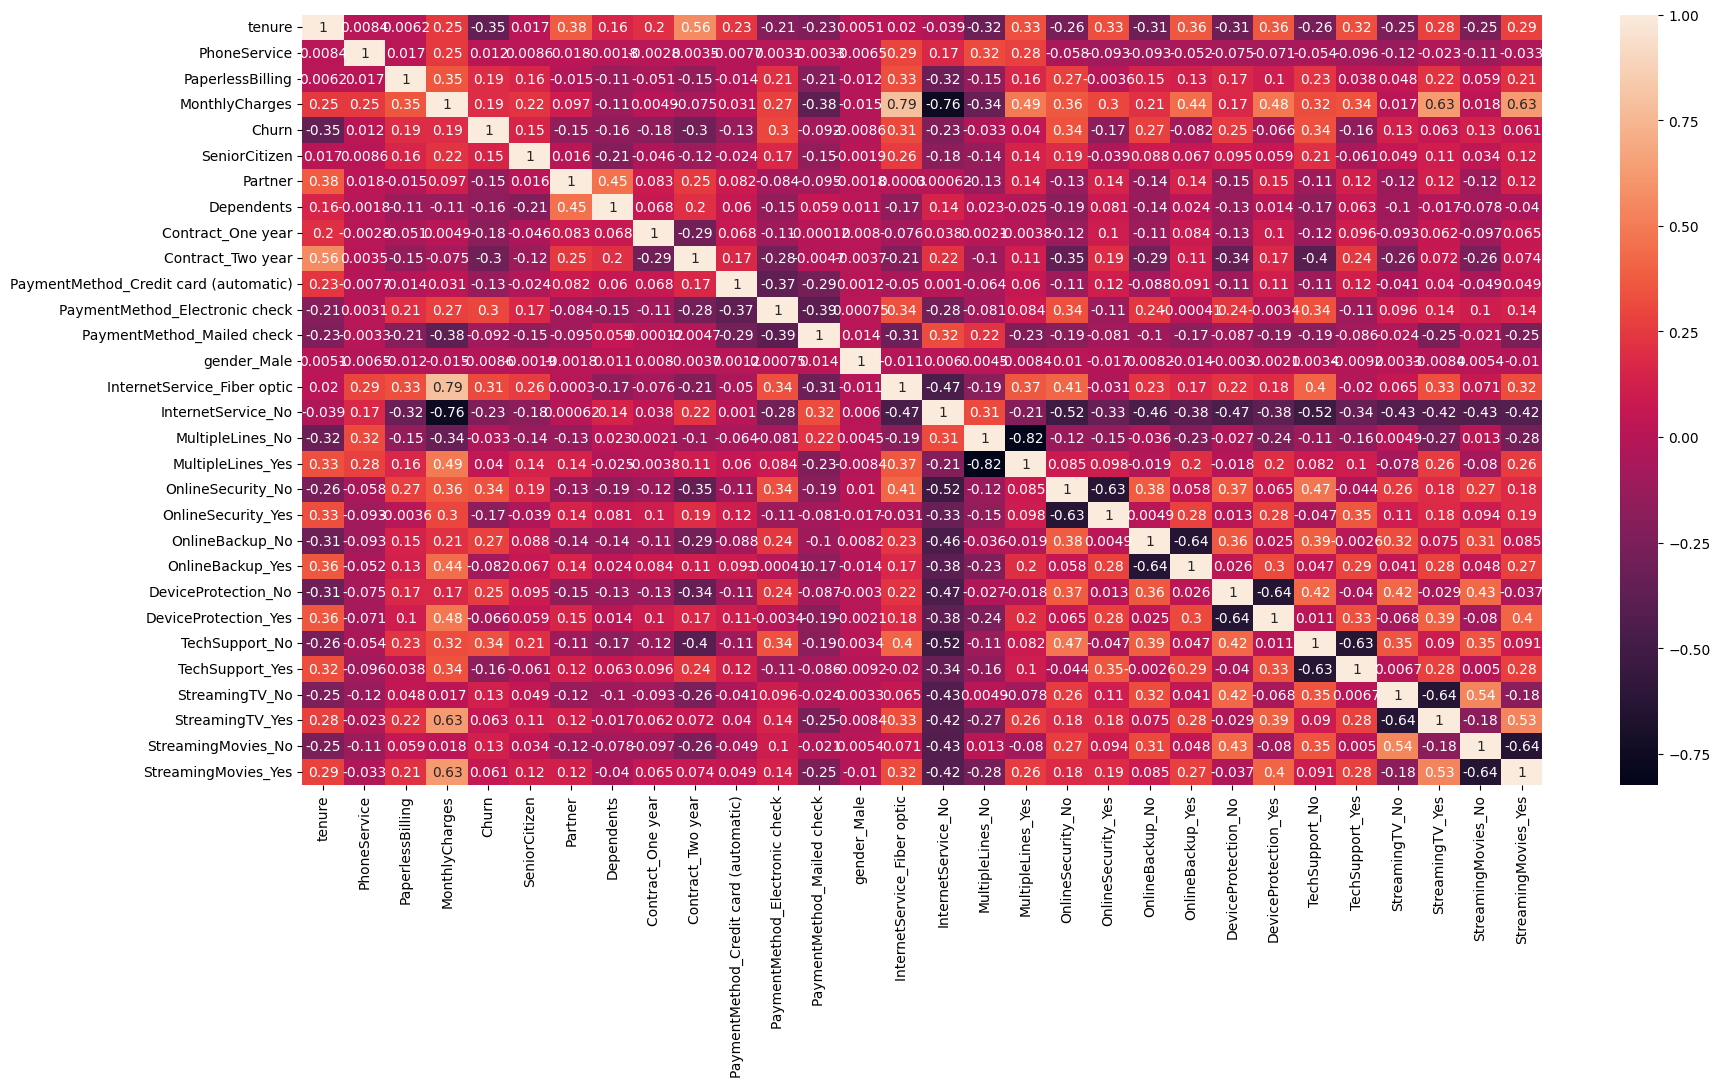

In [23]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [24]:
##Dropping highly correlated dummy variables
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No', 'DeviceProtection_No','TechSupport_No', 'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No' ,'DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], 1)

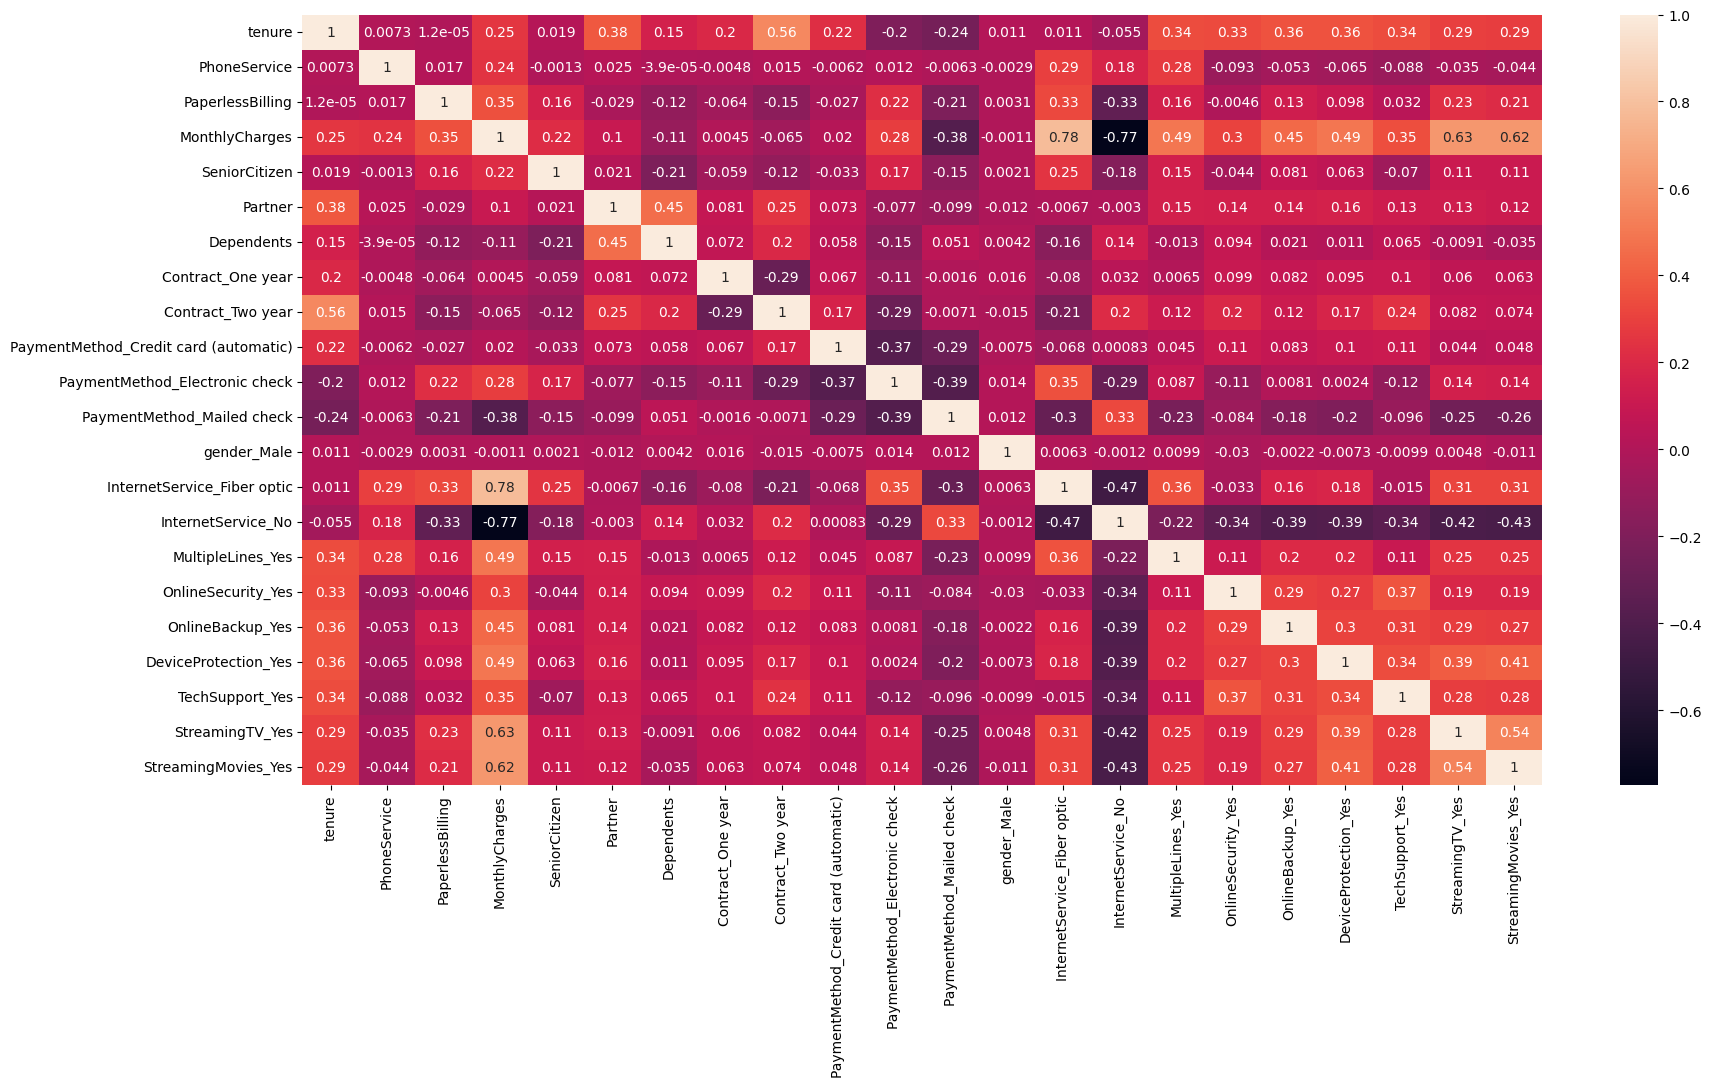

In [25]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [26]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family =
sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.4
Date:                Thu, 02 May 2024   Deviance:                       4026.8
Time:                        04:26:48   Pearson chi2:                 5.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2870
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9626      1.540     -1.923      0.054      -5.981       0.056
tenure                                   -0.8242      0.070    -11.796      0.000      -0.961      -0.687
PhoneService                              0.3979      0.790      0.504      0.615      -1.151       1.946
PaperlessBilling                          0.3393      0.090      3.769      0.000       0.163       0.516
MonthlyCharges                           -1.3383      1.168     -1.146      0.252      -3.627       0.950
SeniorCitizen                             0.2981      0.103      2.896      0.004       0.096       0.500
Partner                                   0.0238      0.094      0.253      0.800      -0.160       0.208
Dependents                               -0.2243      0.108     -2.083      0.037      -0.435      -0.013
Contract_One year                        -0.6731      0.129     -5.235      0.000      -0.925      -0.421
Contract_Two year                        -1.3141      0.205     -6.402      0.000      -1.716      -0.912
PaymentMethod_Credit card (automatic)    -0.1511      0.138     -1.093      0.274      -0.422       0.120
PaymentMethod_Electronic check            0.2803      0.114      2.454      0.014       0.056       0.504
PaymentMethod_Mailed check               -0.0458      0.137     -0.333      0.739      -0.315       0.224
gender_Male                              -0.0366      0.078     -0.467      0.641      -0.190       0.117
InternetService_Fiber optic               2.0009      0.973      2.057      0.040       0.095       3.907
InternetService_No                       -2.0374      0.982     -2.075      0.038      -3.962      -0.113
MultipleLines_Yes                         0.5692      0.216      2.638      0.008       0.146       0.992
OnlineSecurity_Yes                       -0.0340      0.218     -0.156      0.876      -0.460       0.392
OnlineBackup_Yes                         -0.0005      0.212     -0.002      0.998      -0.417       0.416
DeviceProtection_Yes                      0.2140      0.214      0.999      0.318      -0.206       0.634
TechSupport_Yes                          -0.2455      0.220     -1.116      0.265      -0.677       0.186
StreamingTV_Yes                           0.7056      0.399      1.768      0.077      -0.076       1.488
StreamingMovies_Yes                       0.6746      0.398      1.693      0.090      -0.106       1.455
=========================================================================================================
"""

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)

In [29]:
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True, False,  True, False, False,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True])

In [30]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'DeviceProtection_Yes'],
      dtype='object')

In [31]:
col = X_train.columns[rfe.support_]
X_train.columns[rfe.support_]

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [32]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.2
Date:                Thu, 02 May 2024   Deviance:                       4034.4
Time:                        04:32:10   Pearson chi2:                 5.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2859
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3448      0.162     -8.297      0.000      -1.662      -1.027
tenure                            -0.8309      0.067    -12.427      0.000      -0.962      -0.700
PhoneService                      -0.4935      0.152     -3.237      0.001      -0.792      -0.195
PaperlessBilling                   0.3470      0.090      3.869      0.000       0.171       0.523
SeniorCitizen                      0.3350      0.101      3.319      0.001       0.137       0.533
Contract_One year                 -0.6926      0.128     -5.422      0.000      -0.943      -0.442
Contract_Two year                 -1.3362      0.204     -6.541      0.000      -1.737      -0.936
PaymentMethod_Electronic check     0.3456      0.084      4.128      0.000       0.182       0.510
InternetService_Fiber optic        0.9048      0.110      8.207      0.000       0.689       1.121
InternetService_No                -0.9317      0.164     -5.693      0.000      -1.253      -0.611
MultipleLines_Yes                  0.3458      0.095      3.654      0.000       0.160       0.531
OnlineSecurity_Yes                -0.2605      0.101     -2.572      0.010      -0.459      -0.062
OnlineBackup_Yes                  -0.2216      0.092     -2.415      0.016      -0.401      -0.042
TechSupport_Yes                   -0.4671      0.103     -4.521      0.000      -0.670      -0.265
StreamingTV_Yes                    0.2556      0.095      2.679      0.007       0.069       0.443
StreamingMovies_Yes                0.2348      0.095      2.479      0.013       0.049       0.420
==================================================================================================
"""

In [33]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [35]:
y_train_pred[:15]

877     0.052085
5792    0.461652
5334    0.088319
878     0.029363
6578    0.128069
3090    0.457187
3043    0.671063
5028    0.033155
4463    0.694887
2822    0.076177
4206    0.033163
1247    0.228708
3493    0.386724
266     0.012700
4927    0.017587
dtype: float64

In [36]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05208455, 0.46165234, 0.08831923, 0.02936317, 0.12806879,
       0.45718697, 0.67106279, 0.03315497, 0.69488745, 0.07617722])

In [38]:
##Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head(10)

,Churn,Churn_Prob,CustID
0,0,0.052085,877
1,1,0.461652,5792
2,1,0.088319,5334
3,0,0.029363,878
4,0,0.128069,6578
5,1,0.457187,3090
6,1,0.671063,3043
7,0,0.033155,5028
8,1,0.694887,4463
9,1,0.076177,2822


In [42]:
##Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head(30)

,Churn,Churn_Prob,CustID,predicted
0,0,0.052085,877,0
1,1,0.461652,5792,0
2,1,0.088319,5334,0
3,0,0.029363,878,0
4,0,0.128069,6578,0
5,1,0.457187,3090,0
6,1,0.671063,3043,1
7,0,0.033155,5028,0
8,1,0.694887,4463,1
9,1,0.076177,2822,0


In [43]:
from sklearn import metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted )
print(confusion)

[[3252  375]
 [ 565  738]]


In [44]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8093306288032455


In [45]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [46]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5663852647735994

In [47]:
# Let us calculate specificity
TN / float(TN+FP)

0.8966087675765095

In [48]:
# Calculate false postive rate - predicting churn when customer doesnot have churned
print(FP/ float(TN+FP))

0.10339123242349049


In [49]:
# positive predictive value
print (TP / float(TP+FP))

0.6630727762803235


In [50]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8519779931883679
